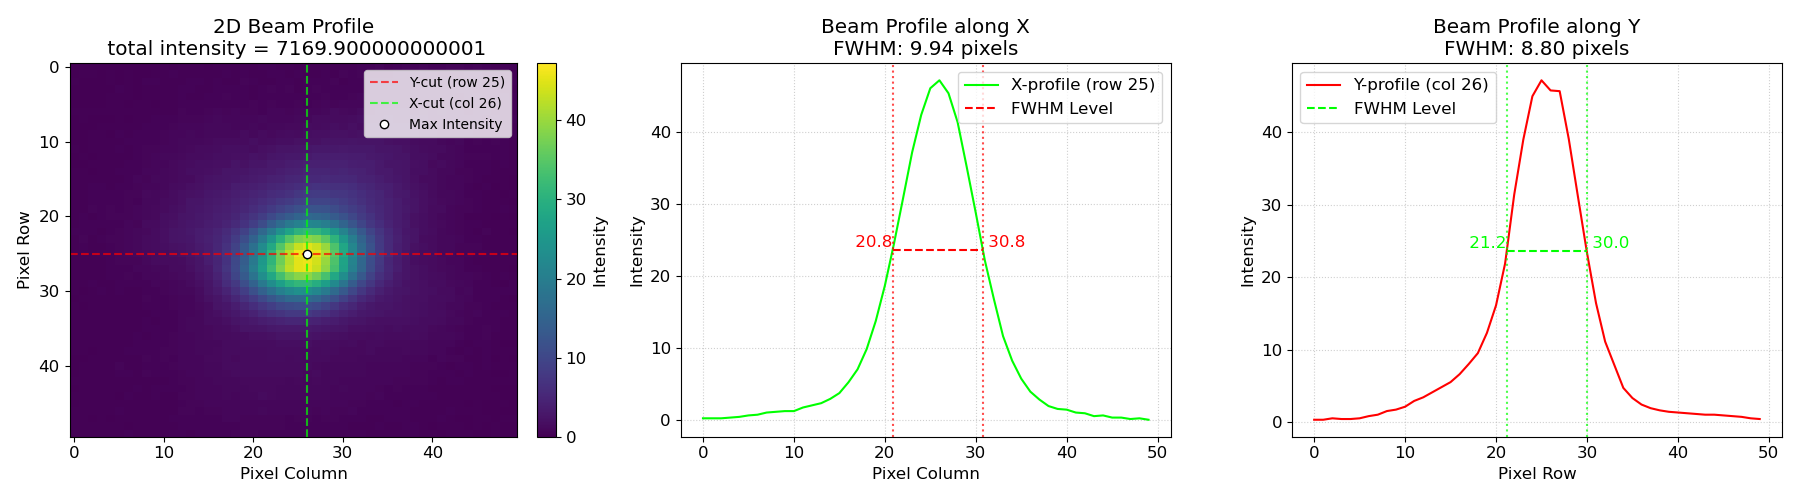

In [62]:

%matplotlib widget
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

dir_path_HIKMICRO = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/HIKMICRO_PowerSeries'
filename = '50 degrees.csv'
x_center_HIKMICRO = 150
y_center_HIKMICRO = 123
width_um = 600
hik_pixel_size = 12
width = width_um / hik_pixel_size
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
beam_analysis_HIKMICRO = BeamAnalysis(dir_path=dir_path_HIKMICRO,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
HIKMICRO_map_array = beam_analysis_HIKMICRO.map_array
fhwm_extractor_HIKMICRO = BeamCharacteristicsExtractor(map_array=HIKMICRO_map_array,
                                                       camera_name='HIKMICRO')
fig_fwhm_extractor_HIKMICRO, axs_fwhm_extractor_HIKMICRO = fhwm_extractor_HIKMICRO.plot_analysis()
fig_fwhm_extractor_HIKMICRO.set_size_inches(12,
                                            5)
HIKMICRO_bg_subtracted_map_array = fhwm_extractor_HIKMICRO.map_array / np.max(fhwm_extractor_HIKMICRO.map_array)

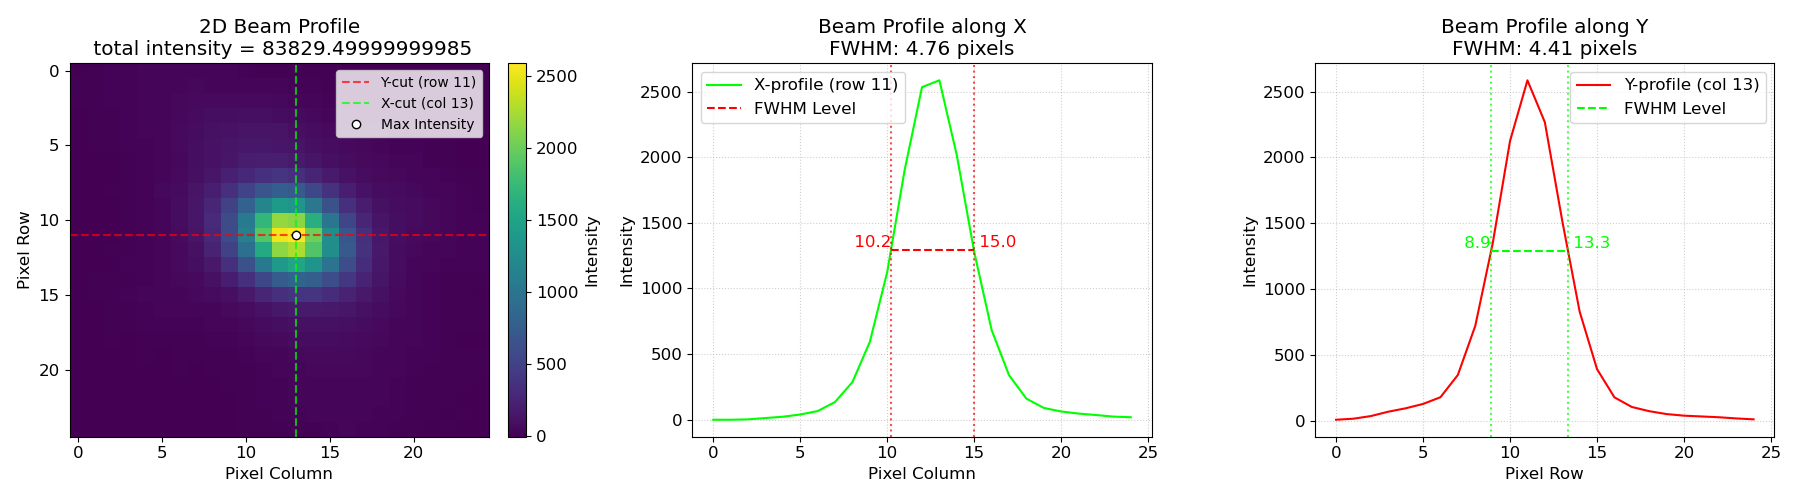

In [63]:
from Code_utilities.BeamAnalysis import BeamAnalysis
from Code_utilities.BeamCharacteristicsExtractor import BeamCharacteristicsExtractor
import numpy as np

%matplotlib widget
# dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PositionSeries/all_measurements'
# filename = '1,55 mm.csv'
dir_path_NEC = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250603/NEC_PowerSeries/50 degrees'
filename = '20250603_130932_261_001_10_01_10.csv'
x_center_NEC = 129 - 7
y_center_NEC = 223
width_um = 600
nec_pixel_size = 23.5
width = width_um / nec_pixel_size
crop_x_range_NEC = (x_center_NEC - width / 2, x_center_NEC + width / 2)
crop_y_range_NEC = (y_center_NEC - width / 2, y_center_NEC + width / 2)
beam_analysis_NEC = BeamAnalysis(dir_path=dir_path_NEC,
                                 signal_filename=filename,
                                 camera_name='NEC',
                                 crop_range_x_pixels=crop_x_range_NEC,
                                 crop_range_y_pixels=crop_y_range_NEC)

Y_ref_position_for_background_subtraction_NEC = 2
map_array_NEC = beam_analysis_NEC.map_array
fhwm_extractor_NEC = BeamCharacteristicsExtractor(map_array=map_array_NEC,
                                                  camera_name='NEC',
                                                  Y_ref_position_for_background_subtraction=Y_ref_position_for_background_subtraction_NEC)
fig_fwhm_extractor_NEC, axs_fwhm_extractor_NEC = fhwm_extractor_NEC.plot_analysis()
fig_fwhm_extractor_NEC.set_size_inches(12,
                                       5)
NEC_bg_subtracted_map_array = fhwm_extractor_NEC.map_array / np.max(fhwm_extractor_NEC.map_array)


      FWHM Analysis Results
Beam 1 (HIKMICRO):
  - X-Profile FWHM: 119.32 µm
  - Y-Profile FWHM: 105.54 µm

Beam 2 (NEC):
  - X-Profile FWHM: 111.96 µm
  - Y-Profile FWHM: 103.73 µm

Plot saved to Beam_Comparison.pdf


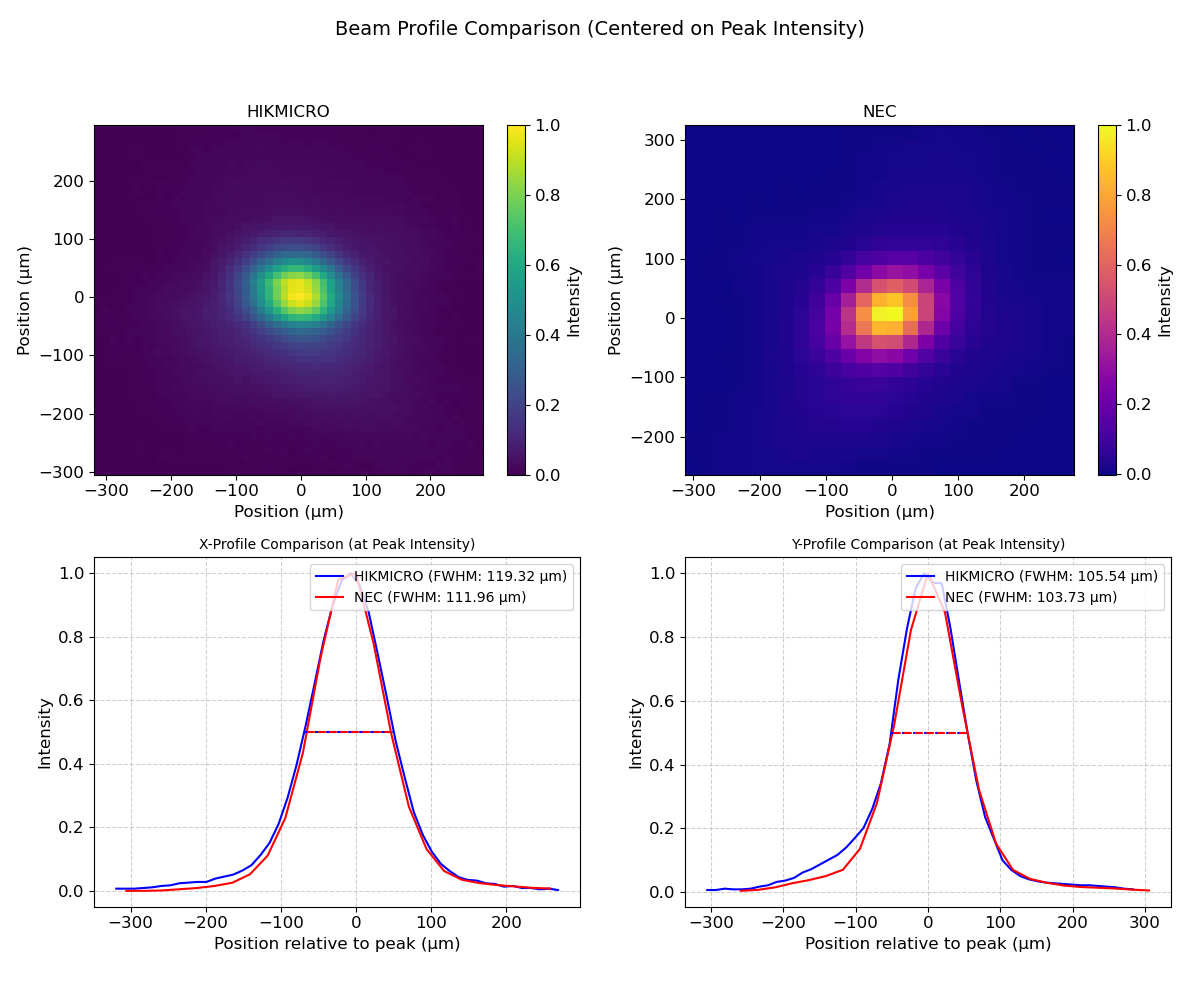

In [64]:
%matplotlib widget

import matplotlib.pyplot as plt

import numpy as np

def calculate_and_print_fwhm(x_values: np.ndarray,
                             y_values: np.ndarray,
                             dataset_label: str) -> float:
    """
    Calculate and print the Full Width at Half Maximum (FWHM) of a given dataset.

    Args:
        x_values (np.ndarray): 1D array of x-axis values.
        y_values (np.ndarray): 1D array of y-axis values corresponding to x_values.
        dataset_label (str): Label/name of the dataset (for printing purposes).

    Returns:
        float: The calculated FWHM in the same units as x_values.
    """
    # Ensure input arrays are numpy arrays
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Find maximum value and half-maximum
    maximum_value = np.max(y_values)
    half_maximum = maximum_value / 2.0

    # Find indices where the data crosses the half-maximum
    indices_above_half = np.where(y_values >= half_maximum)[0]
    if len(indices_above_half) < 2:
        raise ValueError(f"Could not find two points above half maximum for {dataset_label}")

    # Left and right indices around the half-maximum region
    left_index = indices_above_half[0]
    right_index = indices_above_half[-1]

    # Linear interpolation for more precise half-maximum crossing points
    # Left side interpolation
    x_left = np.interp(half_maximum,
                       [y_values[left_index - 1], y_values[left_index]],
                       [x_values[left_index - 1], x_values[left_index]])
    # Right side interpolation
    x_right = np.interp(half_maximum,
                        [y_values[right_index], y_values[right_index + 1]],
                        [x_values[right_index], x_values[right_index + 1]])

    fwhm_value = x_right - x_left
    print(f"FWHM of {dataset_label}: {fwhm_value:.4f} (same units as x)")

    return fwhm_value

def calculate_fwhm(profile,
                   pixel_size):
    """
    Calculates the Full Width at Half Maximum (FWHM) of a 1D profile.
    Uses linear interpolation for better accuracy.

    Args:
        profile (np.ndarray): The 1D array representing the beam profile.
        pixel_size (float): The size of a pixel in micrometers.

    Returns:
        tuple: A tuple containing:
            - fwhm_um (float): The FWHM value in micrometers.
            - left_coord_um (float): The left FWHM coordinate relative to the peak (µm).
            - right_coord_um (float): The right FWHM coordinate relative to the peak (µm).
    """
    try:
        peak_value = np.max(profile)
        half_max = peak_value / 2.0
        peak_idx = np.argmax(profile)

        # Find all indices where the profile is above half-max
        above_half_max_indices = np.where(profile > half_max)[0]
        if len(above_half_max_indices) < 2:
            return 0, 0, 0

        # --- Find left coordinate by interpolation ---
        left_edge_idx = above_half_max_indices[0]
        if left_edge_idx == 0:
            left_coord_pix = 0
        else:
            y1, y2 = profile[left_edge_idx - 1], profile[left_edge_idx]
            x1, x2 = left_edge_idx - 1, left_edge_idx
            left_coord_pix = x1 + (half_max - y1) * (x2 - x1) / (y2 - y1)

        # --- Find right coordinate by interpolation ---
        right_edge_idx = above_half_max_indices[-1]
        if right_edge_idx == len(profile) - 1:
            right_coord_pix = len(profile) - 1
        else:
            y1, y2 = profile[right_edge_idx], profile[right_edge_idx + 1]
            x1, x2 = right_edge_idx, right_edge_idx + 1
            right_coord_pix = x1 + (half_max - y1) * (x2 - x1) / (y2 - y1)

        fwhm_pixels = right_coord_pix - left_coord_pix
        fwhm_um = fwhm_pixels * pixel_size

        # Convert coordinates to be relative to the peak for plotting
        left_coord_um = (left_coord_pix - peak_idx) * pixel_size
        right_coord_um = (right_coord_pix - peak_idx) * pixel_size

        return fwhm_um, left_coord_um, right_coord_um
    except Exception:
        return 0, 0, 0


def plot_beam_comparison(beam1_data,
                         beam2_data,
                         pixel_size1,
                         pixel_size2,
                         label_1,
                         label_2,
                         x_shift_beam_1=0,
                         y_shift_beam_1=0,
                         show_plot=True,
                         save_plot=False,
                         filename='beam_comparison.pdf'):
    """
    Plots a comparison of two beam profiles, scaling axes to micrometers,
    aligning profiles by peak intensity, and calculating FWHM.

    Args:
        beam1_data (np.ndarray): The 2D array representing the first beam.
        beam2_data (np.ndarray): The 2D array representing the second beam.
        pixel_size1 (float): The pixel size in micrometers for the first beam.
        pixel_size2 (float): The pixel size in micrometers for the second beam.
        label_1 (str): Label for the first beam.
        label_2 (str): Label for the second beam.
        x_shift_beam_1 (float): Manual shift for beam 1's X-profile (in um).
        y_shift_beam_1 (float): Manual shift for beam 1's Y-profile (in um).
        show_plot (bool): If True, displays the plot.
        save_plot (bool): If True, saves the plot to a file.
        filename (str): The name of the file to save the plot to.

    Returns:
        matplotlib.figure.Figure: The figure object containing the plots.
        matplotlib.axes.Axes: The axes object containing the subplots.
    """
    fig, axs = plt.subplots(2,
                            2,
                            figsize=(12, 10))
    fig.suptitle('Beam Profile Comparison (Centered on Peak Intensity)',
                 fontsize=14)
    #

    # For Beam 1
    is_nan_1 = np.isnan(beam1_data).any()
    is_inf_1 = np.isinf(beam1_data).any()
    if is_nan_1 or is_inf_1:
        print(f"WARNING: Beam 1 data contains NaN: {is_nan_1} or Inf: {is_inf_1}")

    # For Beam 2
    is_nan_2 = np.isnan(beam2_data).any()
    is_inf_2 = np.isinf(beam2_data).any()
    if is_nan_2 or is_inf_2:
        print(f"WARNING: Beam 2 data contains NaN: {is_nan_2} or Inf: {is_inf_2}")

    # --- Process Beam 1 ---
    rows1, cols1 = beam1_data.shape
    max_row1, max_col1 = np.unravel_index(np.argmax(beam1_data),
                                          (rows1, cols1))
    y_extent1, x_extent1 = rows1 * pixel_size1, cols1 * pixel_size1
    peak_x1_um, peak_y1_um = max_col1 * pixel_size1, max_row1 * pixel_size1

    x_shift_1 = - peak_x1_um - x_shift_beam_1
    y_shift_1 = - peak_y1_um - y_shift_beam_1

    x_axis1_shifted = (np.arange(cols1) * pixel_size1) + x_shift_1
    y_axis1_shifted = (np.arange(rows1) * pixel_size1) + y_shift_1

    im1 = axs[0, 0].imshow(beam1_data,
                           extent=[0 + x_shift_1, x_extent1 + x_shift_1, 0 + y_shift_1, y_extent1 + y_shift_1],
                           aspect='auto',
                           cmap='viridis',
                           origin='lower')

    axs[0, 0].set_title(label_1,
                        fontsize=12)
    axs[0, 0].set_xlabel('Position (μm)')
    axs[0, 0].set_ylabel('Position (μm)')

    fig.colorbar(im1,
                 ax=axs[0, 0],
                 label='Intensity')

    profile_x1, profile_y1 = beam1_data[max_row1, :], beam1_data[:, max_col1]

    fwhm_x1, fwhm_x1_left, fwhm_x1_right = calculate_fwhm(profile_x1,
                                                          pixel_size1)
    fwhm_y1, fwhm_y1_left, fwhm_y1_right = calculate_fwhm(profile_y1,
                                                          pixel_size1)

    # --- Process Beam 2 ---
    rows2, cols2 = beam2_data.shape
    max_row2, max_col2 = np.unravel_index(np.argmax(beam2_data),
                                          (rows2, cols2))
    y_extent2, x_extent2 = rows2 * pixel_size2, cols2 * pixel_size2
    peak_x2_um, peak_y2_um = max_col2 * pixel_size2, max_row2 * pixel_size2

    x_shift_2 = - peak_x2_um - x_shift_beam_1
    y_shift_2 = - peak_y2_um - y_shift_beam_1

    im2 = axs[0, 1].imshow(beam2_data,
                           extent=[0 + x_shift_2, x_extent2 + x_shift_2, 0 + y_shift_2, y_extent2 + y_shift_2],
                           aspect='auto',
                           cmap='plasma',
                           origin='lower')

    axs[0, 1].set_title(label_2,
                        fontsize=12)
    axs[0, 1].set_xlabel('Position (μm)')
    axs[0, 1].set_ylabel('Position (μm)')

    fig.colorbar(im2,
                 ax=axs[0, 1],
                 label='Intensity')

    profile_x2, profile_y2 = beam2_data[max_row2, :], beam2_data[:, max_col2]
    x_axis2_shifted = (np.arange(cols2) * pixel_size2) - peak_x2_um
    y_axis2_shifted = (np.arange(rows2) * pixel_size2) - peak_y2_um

    fwhm_x2, fwhm_x2_left, fwhm_x2_right = calculate_fwhm(profile_x2,
                                                          pixel_size2)
    fwhm_y2, fwhm_y2_left, fwhm_y2_right = calculate_fwhm(profile_y2,
                                                          pixel_size2)

    # --- Print FWHM results to console ---
    print("\n" + "=" * 30)
    print("      FWHM Analysis Results")
    print("=" * 30)
    print(f"Beam 1 ({label_1}):")
    print(f"  - X-Profile FWHM: {fwhm_x1:.2f} µm")
    print(f"  - Y-Profile FWHM: {fwhm_y1:.2f} µm")
    print(f"\nBeam 2 ({label_2}):")
    print(f"  - X-Profile FWHM: {fwhm_x2:.2f} µm")
    print(f"  - Y-Profile FWHM: {fwhm_y2:.2f} µm")
    print("=" * 30 + "\n")

    # --- Comparison Plots ---
    # X-Profile Comparison
    ax = axs[1, 0]
    ax.plot(x_axis1_shifted,
            profile_x1,
            label=f"{label_1} (FWHM: {fwhm_x1:.2f} µm)",
            color='blue')
    ax.plot(x_axis2_shifted,
            profile_x2,
            label=f"{label_2} (FWHM: {fwhm_x2:.2f} µm)",
            color='red')
    if fwhm_x1 > 0: ax.plot([fwhm_x1_left - x_shift_beam_1, fwhm_x1_right - x_shift_beam_1],
                            [np.max(profile_x1) / 2, np.max(profile_x1) / 2],
                            '--',
                            color='blue')
    if fwhm_x2 > 0: ax.plot([fwhm_x2_left, fwhm_x2_right],
                            [np.max(profile_x2) / 2, np.max(profile_x2) / 2],
                            '--',
                            color='red')
    ax.set_title('X-Profile Comparison (at Peak Intensity)',
                 fontsize=10)
    ax.set_xlabel('Position relative to peak (μm)')
    ax.set_ylabel('Intensity')
    ax.legend(fontsize='small')
    ax.grid(True,
            linestyle='--',
            alpha=0.6)

    # Y-Profile Comparison
    ax = axs[1, 1]
    ax.plot(y_axis1_shifted,
            profile_y1,
            label=f"{label_1} (FWHM: {fwhm_y1:.2f} µm)",
            color='blue')
    ax.plot(y_axis2_shifted,
            profile_y2,
            label=f"{label_2} (FWHM: {fwhm_y2:.2f} µm)",
            color='red')
    if fwhm_y1 > 0: ax.plot([fwhm_y1_left - y_shift_beam_1, fwhm_y1_right - y_shift_beam_1],
                            [np.max(profile_y1) / 2, np.max(profile_y1) / 2],
                            '--',
                            color='blue')
    if fwhm_y2 > 0: ax.plot([fwhm_y2_left, fwhm_y2_right],
                            [np.max(profile_y2) / 2, np.max(profile_y2) / 2],
                            '--',
                            color='red')
    ax.set_title('Y-Profile Comparison (at Peak Intensity)',
                 fontsize=10)
    ax.set_xlabel('Position relative to peak (μm)')
    ax.set_ylabel('Intensity')
    ax.legend(fontsize='small')
    ax.grid(True,
            linestyle='--',
            alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    if save_plot:
        plt.savefig(filename)
        print(f"Plot saved to {filename}")

    if show_plot:
        plt.show()

    return fig, axs


x_shift_beam_1 = +7
y_shift_beam_1 = +5
fig, axs = plot_beam_comparison(beam1_data=HIKMICRO_bg_subtracted_map_array,
                                beam2_data=NEC_bg_subtracted_map_array,
                                pixel_size1=beam_analysis_HIKMICRO.pixel_size_um,
                                pixel_size2=beam_analysis_NEC.pixel_size_um,
                                x_shift_beam_1=x_shift_beam_1,
                                y_shift_beam_1=y_shift_beam_1,
                                label_1='HIKMICRO',
                                label_2='NEC',
                                filename='Beam_Comparison.pdf',
                                save_plot=True,
                                show_plot=True)


fig saved to /Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Manuscripts/Low THz Camera MS/Figures/Figure 2/fig_hik.pdf


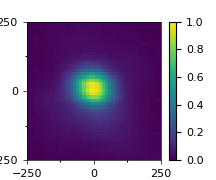

In [65]:
from Code_utilities.StandartFigureClass import StandardFigure
from Code_utilities.InputParametersClass import InputParametersClass
%matplotlib widget
plt.close('all')
save_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Manuscripts/Low THz Camera MS/Figures/Figure 2'

fontsize = InputParametersClass().fontsize
HIKFig = StandardFigure(font_size=fontsize)
fig_hik, ax_hik = HIKFig.fig, HIKFig.ax
fig_size = 1.8

pixel_size1 = beam_analysis_HIKMICRO.pixel_size_um

rows1, cols1 = HIKMICRO_bg_subtracted_map_array.shape
max_row1, max_col1 = np.unravel_index(np.argmax(HIKMICRO_bg_subtracted_map_array),
                                      (rows1, cols1))
y_extent1, x_extent1 = rows1 * pixel_size1, cols1 * pixel_size1
peak_x1_um, peak_y1_um = max_col1 * pixel_size1, max_row1 * pixel_size1

x_shift_1 = - peak_x1_um - x_shift_beam_1
y_shift_1 = - peak_y1_um - y_shift_beam_1

x_axis1_shifted = (np.arange(cols1) * pixel_size1) + x_shift_1
y_axis1_shifted = (np.arange(rows1) * pixel_size1) + y_shift_1

im1 = ax_hik.imshow(HIKMICRO_bg_subtracted_map_array,
                    extent=[0 + x_shift_1, x_extent1 + x_shift_1, 0 + y_shift_1, y_extent1 + y_shift_1],
                    aspect='auto',
                    cmap='viridis',
                    origin='lower')

ax_hik.set_xlabel('Position (μm)')
ax_hik.set_ylabel('Position (μm)')
plot_lim_parameter = 250
ax_hik.set_xlim(-plot_lim_parameter, plot_lim_parameter)
ax_hik.set_ylim(-plot_lim_parameter, plot_lim_parameter)
cbar_hik = fig_hik.colorbar(im1,
                            ax=ax_hik, )
# cbar_hik.set_label('Intensity',
#                    fontsize=fontsize)
cbar_hik.ax.tick_params(labelsize=fontsize)

fig_hik.set_size_inches(fig_size*1.2,
                        fig_size)
from matplotlib.ticker import MaxNLocator



# Set the maximum number of ticks on the x-axis
ax_hik.xaxis.set_major_locator(MaxNLocator(nbins=2))
ax_hik.yaxis.set_major_locator(MaxNLocator(nbins=2))

from matplotlib.ticker import AutoMinorLocator
ax_hik.xaxis.set_minor_locator(AutoMinorLocator(2))  # 2 minor ticks between majors
ax_hik.yaxis.set_minor_locator(AutoMinorLocator(2))
ax_hik.tick_params(axis='both', which='minor', direction='out', length=1.5, width=0.8)

ax_hik.tick_params(direction='out')  # ticks will point outward

fig_hik.savefig(save_path + '/fig_hik.pdf',
                bbox_inches='tight', )
print('fig saved to {}'.format(save_path + '/fig_hik.pdf'))




fig saved to /Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Manuscripts/Low THz Camera MS/Figures/Figure 2/fig_nec.pdf


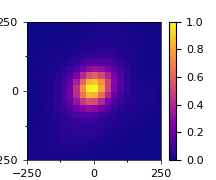

In [66]:
from Code_utilities.StandartFigureClass import StandardFigure
from Code_utilities.InputParametersClass import InputParametersClass
%matplotlib widget
save_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/Manuscripts/Low THz Camera MS/Figures/Figure 2'

fontsize = InputParametersClass().fontsize
necFig = StandardFigure(font_size=fontsize)
fig_nec, ax_nec = necFig.fig, necFig.ax

pixel_size2 = beam_analysis_NEC.pixel_size_um

rows2, cols2 = NEC_bg_subtracted_map_array.shape
max_row2, max_col2 = np.unravel_index(np.argmax(NEC_bg_subtracted_map_array),
                                      (rows2, cols2))
y_extent2, x_extent2 = rows2 * pixel_size2, cols2 * pixel_size2
peak_x2_um, peak_y2_um = max_col2 * pixel_size2, max_row2 * pixel_size2

x_shift_2 = - peak_x2_um - x_shift_beam_1
y_shift_2 = - peak_y2_um - y_shift_beam_1

x_axis2_shifted = (np.arange(cols2) * pixel_size2) + x_shift_2
y_axis2_shifted = (np.arange(rows2) * pixel_size2) + y_shift_2

im2 = ax_nec.imshow(NEC_bg_subtracted_map_array,
                    extent=[0 + x_shift_2, x_extent2 + x_shift_2, 0 + y_shift_2, y_extent2 + y_shift_2],
                    aspect='auto',
                    cmap='plasma',
                    origin='lower')

ax_nec.set_xlabel('Position (μm)')
ax_nec.set_ylabel('Position (μm)')

plot_lim_parameter = 250
ax_nec.set_xlim(-plot_lim_parameter, plot_lim_parameter)
ax_nec.set_ylim(-plot_lim_parameter, plot_lim_parameter)

cbar_nec = fig_nec.colorbar(im2,
                            ax=ax_nec, )
# cbar_nec.set_label('Intensity',
#                    fontsize=fontsize)
cbar_nec.ax.tick_params(labelsize=fontsize)

fig_nec.set_size_inches(fig_size*1.2,
                        fig_size)
from matplotlib.ticker import MaxNLocator

# Set the maximum number of ticks on the x-axis
ax_nec.xaxis.set_major_locator(MaxNLocator(nbins=2))
ax_nec.yaxis.set_major_locator(MaxNLocator(nbins=2))

from matplotlib.ticker import AutoMinorLocator
ax_nec.xaxis.set_minor_locator(AutoMinorLocator(2))  # 2 minor ticks between majors
ax_nec.yaxis.set_minor_locator(AutoMinorLocator(2))
ax_nec.tick_params(axis='both', which='minor', direction='out', length=1.5, width=0.8)

ax_nec.tick_params(direction='out')  # ticks will point outward

fig_nec.savefig(save_path + '/fig_nec.pdf',
                bbox_inches='tight', )
print('fig saved to {}'.format(save_path + '/fig_nec.pdf'))

FWHM of IR Camera: 121.8621 (same units as x)
FWHM of THz Camera: 112.4084 (same units as x)


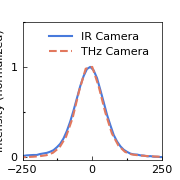

In [69]:
%matplotlib widget
FigXProfile = StandardFigure(font_size=fontsize)
fig_x_profile, ax_x_profile = FigXProfile.fig, FigXProfile.ax

beam1_data = HIKMICRO_bg_subtracted_map_array
beam2_data = NEC_bg_subtracted_map_array

label_1 = 'IR Camera'
label_2 = 'THz Camera'

profile_x1, profile_y1 = beam1_data[max_row1, :], beam1_data[:, max_col1]
profile_x2, profile_y2 = beam2_data[max_row2, :], beam2_data[:, max_col2]

calculate_and_print_fwhm(x_axis1_shifted, profile_x1, label_1)
calculate_and_print_fwhm(x_axis2_shifted, profile_x2, label_2)

ax_x_profile.plot(x_axis1_shifted,
                  profile_x1,
                  label=f"{label_1} ",
                  color=InputParametersClass().color_nice_blue)
ax_x_profile.plot(x_axis2_shifted + 7,
                  profile_x2,
                  label=f"{label_2} ",
                  color=InputParametersClass().color_nice_orange,
                  linestyle='--')
ax_x_profile.set_xlim(-250,
                      +250)
ax_x_profile.set_ylim(-0.03,1.5)

from matplotlib.ticker import NullLocator

# Make major ticks point inward on both axes
ax_x_profile.tick_params(direction='in',
                         which='major')

# Remove minor ticks from both axes
ax_x_profile.xaxis.set_minor_locator(NullLocator())
ax_x_profile.yaxis.set_minor_locator(NullLocator())

ax_x_profile.set_xlabel('Position (μm)')
ax_x_profile.set_ylabel('Intensity (normalized)')
ax_x_profile.legend(title_fontsize=fontsize,
                    fontsize=fontsize,
                    frameon=False,
                    loc='upper right'
                    )

from matplotlib.ticker import AutoMinorLocator
ax_x_profile.xaxis.set_minor_locator(AutoMinorLocator(2))  # 2 minor ticks between majors
ax_x_profile.yaxis.set_minor_locator(AutoMinorLocator(2))
ax_x_profile.tick_params(axis='both', which='minor', direction='in', length=1.5, width=0.8)

ax_x_profile.grid(False)
ax_x_profile.xaxis.set_major_locator(MaxNLocator(nbins=2))
fig_x_profile.set_size_inches(fig_size,
                              fig_size)
fig_x_profile.savefig(save_path + '/fig_x_profile.pdf',
                      bbox_inches='tight')


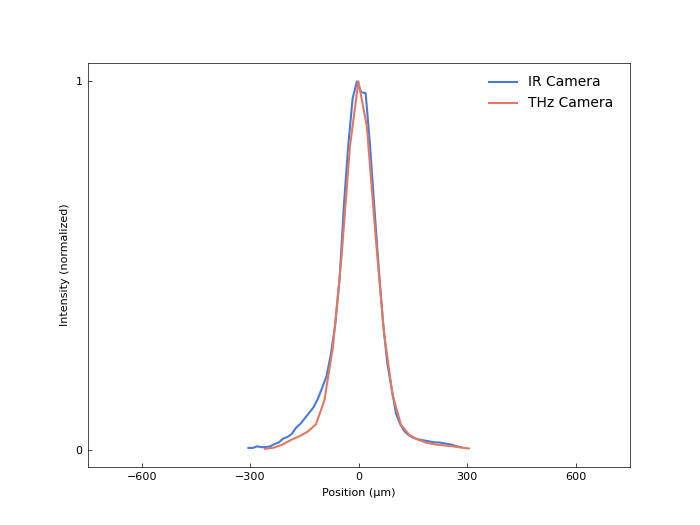

In [68]:
%matplotlib widget
FigyProfile = StandardFigure(font_size=fontsize)
fig_y_profile, ax_y_profile = FigyProfile.fig, FigyProfile.ax

beam1_data = HIKMICRO_bg_subtracted_map_array
beam2_data = NEC_bg_subtracted_map_array

label_1 = 'IR Camera'
label_2 = 'THz Camera'

profile_y1, profile_y1 = beam1_data[max_row1, :], beam1_data[:, max_col1]
profile_y2, profile_y2 = beam2_data[max_row2, :], beam2_data[:, max_col2]

ax_y_profile.plot(y_axis1_shifted,
                  profile_y1,
                  label=f"{label_1} ",
                  color=InputParametersClass().color_nice_blue)
ax_y_profile.plot(y_axis2_shifted + 4,
                  profile_y2,
                  label=f"{label_2} ",
                  color=InputParametersClass().color_nice_orange)
ax_y_profile.set_xlim(-750,
                      +750)

from matplotlib.ticker import NullLocator

# Make major ticks point inward on both axes
ax_y_profile.tick_params(direction='in',
                         which='major')

# Remove minor ticks from both axes
ax_y_profile.xaxis.set_minor_locator(NullLocator())
ax_y_profile.yaxis.set_minor_locator(NullLocator())

ax_y_profile.set_xlabel('Position (μm)')
ax_y_profile.set_ylabel('Intensity (normalized)')
ax_y_profile.legend(fontsize='small',
                    frameon=False, )
ax_y_profile.grid(False)

fig_y_profile.savefig(save_path + '/fig_y_profile.pdf')